<div style="color:#483D8B;text-align:center">
  <h1> Plotting Distributions </h1>
  <h3> Ryan Gust </h3>
  <h4> Updated: 2019-01-09 </h4>
</div>

## Overview

This notebook will demonstrate the plotting of a few staple statistical functions with python:.

For a normal distribution and Student's T distribution (degrees of freedom = 4,8,12,30) the following will be plotted:
* **Probability Density Function (PDF)** - A function of a continuous random variable, whose integral across an interval denotes the probability that the variable's value lies within the same interval.
* **Cumulative Distribution Function (CDF)** - A function whose value is the probability that a corresponding continuous random variable has a value less than or equal to the function's argument
* **Quantile Function/Inverse Cumulative Distribution Function** - A function that determines the value of the variable associated with a specific probability, such that the probability of the variable being less than or equal to that value equals the given probability.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

## Data

The data used for this notebook is generated with numpy's `linspace` function, chosen on an symmetric interval from *__-e__* to *__e__* which, when used as a z-score, encompasses ~99.67% of a normal distribution 

The variable naming convention used specifies `x_norm`, `x_t` as input values and `y_norm_<func>`,`y_t_<func>` as function output values

In [2]:
mu = 0; sigma = 1
x_norm = np.linspace(-np.e, np.e,100) # Very close to np.linspace(ss.norm.ppf(0.0033),ss.norm.ppf(0.9967), 100) 

## Exploratory Data Analysis

We will be using an artificially generated dataset for the purpose of this demonstration, as such, no preprocessing is required.

### Normal distribution

In [3]:
y_norm_pdf = ss.norm.pdf(x_norm, loc=mu, scale=sigma)
y_norm_cdf = ss.norm.cdf(x_norm, loc=mu, scale=sigma)
y_norm_icdf= ss.norm.ppf(x_norm, loc=mu, scale=sigma)

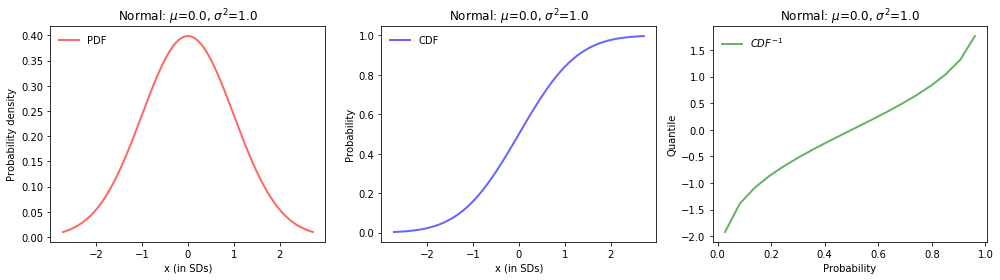

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(14,4))
ax1, ax2, ax3 = axes

ax1.plot(x_norm, y_norm_pdf, 'r-', lw=2, alpha=0.6, label='PDF')
ax1.set_xlabel('x (in SDs)')
ax1.set_ylabel('Probability density')

ax2.plot(x_norm, y_norm_cdf, 'b-', lw=2, alpha=0.6, label='CDF')
ax2.set_xlabel('x (in SDs)')
ax2.set_ylabel('Probability')

ax3.plot(x_norm, y_norm_icdf, 'g-', lw=2, alpha=0.6, label='$CDF^{-1}$')
ax3.set_xlabel('Probability')
ax3.set_ylabel('Quantile')

for ax in axes:
    ax.set_title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu, sigma))
    ax.legend(loc='upper left', frameon=False)
plt.tight_layout()
plt.show()

### Student's T Distribution

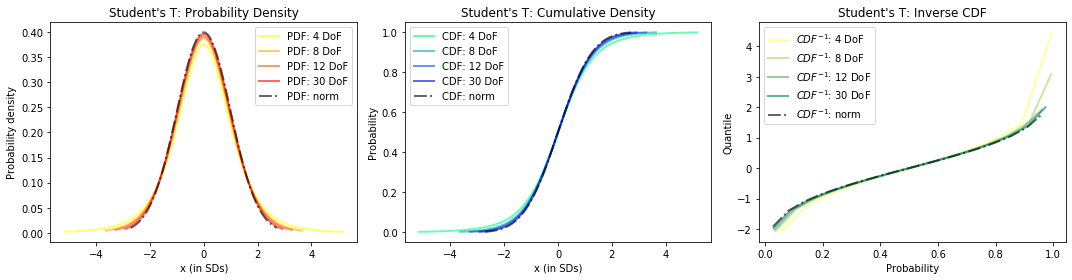

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
ax1, ax2, ax3 = axes

ax1c = iter(plt.cm.autumn(np.linspace(0,1,4)[::-1]))
ax2c = iter(plt.cm.winter(np.linspace(0,1,4)[::-1]))
ax3c = iter(plt.cm.summer(np.linspace(0,1,4)[::-1]))

for df in [4,8,12,30]:
    x_t = np.linspace(ss.t.ppf(0.0033, df), ss.t.ppf(0.9967, df), 100) # Set close to norm for consistency

    ax1.plot(x_t, ss.t.pdf(x_t, df), c=next(ax1c), lw=2, alpha=0.6, label=f'PDF: {df} DoF')
    ax2.plot(x_t, ss.t.cdf(x_t, df), c=next(ax2c), lw=2, alpha=0.6, label=f'CDF: {df} DoF')
    ax3.plot(x_t, ss.t.ppf(x_t, df), c=next(ax3c), lw=2, alpha=0.6, label='$CDF^{-1}$: %d DoF' % (df))

ax1.plot(x_norm, y_norm_pdf, '-.',color='black', lw=2, alpha=0.6, label='PDF: norm')
ax1.update({'xlabel':'x (in SDs)', 'ylabel':'Probability density', 'title':"Student's T: Probability Density"})

ax2.plot(x_norm, y_norm_cdf, '-.',color='black', lw=2, alpha=0.6, label='CDF: norm')
ax2.update({'xlabel':'x (in SDs)', 'ylabel':'Probability', 'title':"Student's T: Cumulative Density"})

ax3.plot(x_norm, y_norm_icdf,'-.',color='black', lw=2, alpha=0.6, label='$CDF^{-1}$: norm')
ax3.update({'xlabel':'Probability', 'ylabel':'Quantile', 'title':"Student's T: Inverse CDF"})

[a.legend() for a in axes]
plt.tight_layout()
plt.show()

We can see as we raise the degrees of freedom, each graph increasingly begins to look like the normal distribution graphs above. Degrees of freedom can be thought of as the minimum number of independent coordinates that can determine the position of entire system.

## Conclusions

This notebook demonstrates the calculation and plotting of three fundamental statistical functions:
- Probability Density Function
- Cumulative Distribution Function
- Quantile Function/Inverse Cumulative Distribution Function

for a normal distribution and Student's T distributions with varying degrees of freedom

#### Future work
Other works could involve using an actual dataset rather than a contrived one to look for interesting real-world insights, exploring additional distributions such as Weibull, Gamma, Beta, or Chi-Square, and applying other statistical functions like the survival and momentum generating functions.

### References

Definitions:
1. https://en.oxforddictionaries.com/definition/probability_density_function
2. https://en.oxforddictionaries.com/definition/us/cumulative_distribution_function
3. https://en.wikipedia.org/wiki/Quantile_function
4. https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/basics/using-the-inverse-cumulative-distribution-function-icdf/

Docs and Code Snippets:
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
2. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t
3. https://matplotlib.org/tutorials/colors/colormaps.html
4. http://bigdata-madesimple.com/how-to-implement-these-5-powerful-probability-distributions-in-python/

Other Resources:
1. http://pages.stat.wisc.edu/~ifischer/Statistical_Tables/Z-distribution.pdf
2. https://www.intmath.com/counting-probability/14-normal-probability-distribution.php
3. https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)